In [1]:
from __future__ import division
import oot
import numpy as np
import matplotlib.pyplot as plt

from astropy import units as u
from astropy.constants import G
from astropy.io import ascii
from matplotlib import gridspec
import scipy.optimize as sciop

import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')

%matplotlib inline

In [90]:
data = ascii.read("./CDJ34_5Gyr_reformatted.txt")
print len(data['System ID'])

23581


In [91]:
print data.colnames

['System ID', 'Planet ID', 'Timestep', 'Core Mass [Mearth]', 'Envelope Mass [Mearth]', 'Total Mass [Mearth]', 'Surface Luminosity', 'Accretion rate of planetesimals', 'Accretion rate into envelope', 'Core Radius [Rjup]', 'Pressure at core-envelope interface [bar]', 'Temperature at core-envelope interface [K]', 'Gas density at core-envelope interface [g/cm^3]', 'Total Radius [Rjup]', 'Total Luminosity', 'Surface Pressure [bar]', 'Surface Temperature [K]', 'Semi Major Axis [AU]', 'Sound Speed', 'Mass of gas disc [Mearth]', 'Mass of the planetesimal disc [Mearth]', 'Hill sphere radius [RJ]', 'Bondi Radius', 'Timestep [yr]', 'Mean planetesimal surface density in Feeding zone', 'Nominal width of feeding zone [AU]', "Planetesimals' capture radius [RJ]", 'Disk midplane temperature in PLANETE. Equilibrium temperature in COMPLETO', 'Disk midplane pressure [bar]', 'Migration Type', 'Mass of ejected solids', 'Mass of accreted solids', 'Isolation mass in Earth masses', 'Gas surface density at plan

In [92]:
goodMask = (data['Semi Major Axis [AU]'] > 0.005)
data = data[goodMask]

print len(data)

23343


In [96]:
maxDeltaLs = np.zeros((len(data['System ID'])))
maxDeltaVs = np.zeros((len(data['System ID'])))
vPhis = np.zeros((len(data['System ID'])))

for i in range(0,len(maxDeltaLs)):
    planet=oot.planet()
    planet.M=1 #sun-like star
    planet.R=1
    planet.Mp=(data['Total Mass [Mearth]'][i]*u.earthMass).to(u.solMass).value
    planet.Rp=(data['Total Radius [Rjup]'][i]*u.jupiterRad).to(u.solRad).value
    planet.a=(data['Semi Major Axis [AU]'][i]*u.AU).to(u.solRad).value
    planet.e=data['Planet eccentricity'][i]
    planet.vTheta=data['Planet inclination'][i]
    planet.vPhi=np.random.uniform(low=0.,high=2.*np.pi)
    vPhis[i] = planet.vPhi
    
    period=oot.findPeriod(planet)
    ts=np.linspace(-period/2,period/2,200)
    
    deltaL=oot.deltaSum(ts,planet)
    
    maxDeltaLs[i] = np.max(np.abs(deltaL))
    
    deltaV=oot.vTide(ts,planet)
    
    maxDeltaVs[i] = np.max(np.abs(deltaV))

In [97]:
ms = np.array(data['Total Mass [Mearth]'])
rs = np.array(data['Total Radius [Rjup]'])
smas = np.array(data['Semi Major Axis [AU]'])
ls = np.array(data['Total Luminosity'])
es = np.array(data['Planet eccentricity'])

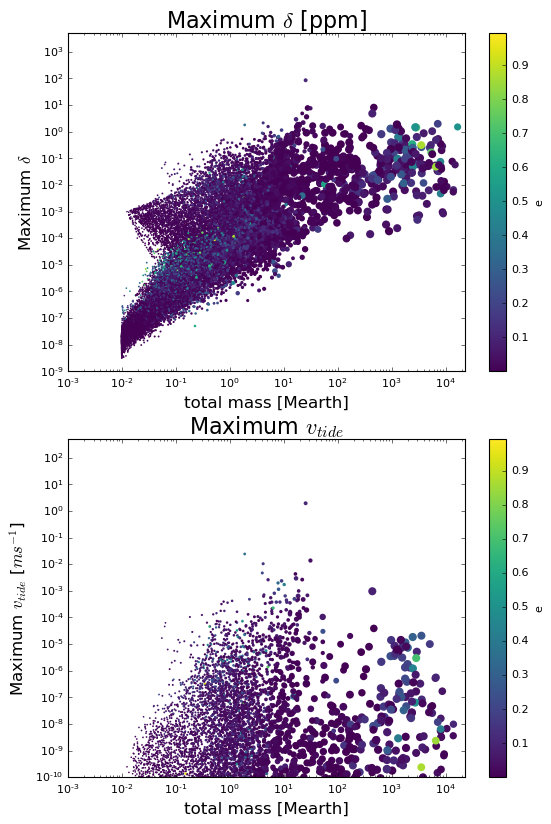

In [99]:
fig, axes = plt.subplots(2,1,figsize=(8,12))

sc0 = axes[0].scatter(ms, 1e6*maxDeltaLs, s=(rs*50)+1, c=es, cmap='viridis',edgecolors="None")
axes[0].set_xlabel("total mass [Mearth]",fontsize=15)
axes[0].set_ylabel(r"Maximum $\delta$",fontsize=15)
axes[0].set_xlim(0.001,22530.)
axes[0].set_ylim(1.e-9,5000.)
axes[0].set_xscale("log")
axes[0].set_yscale("log")
axes[0].set_title(r"Maximum $\delta$ [ppm]",fontsize=20)
plt.colorbar(sc0,ax=axes[0],label=r"e")

sc1 = axes[1].scatter(ms, maxDeltaVs, s=(rs*50)+1, c=es, cmap='viridis',edgecolors="None")
axes[1].set_xlabel("total mass [Mearth]",fontsize=15)
axes[1].set_ylabel(r'Maximum $v_{tide}$ [$ms^{-1}$]',fontsize=15)
axes[1].set_xlim(0.001,22530.)
axes[1].set_ylim(1.e-10,500.)
axes[1].set_xscale("log")
axes[1].set_yscale("log")
axes[1].set_title(r'Maximum $v_{tide}$',fontsize=20)
plt.colorbar(sc0,ax=axes[1],label=r"e")

#plt.show()
plt.savefig("./maxDeltas_vtide.png",fmt="png")